In [27]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Cleaned Dataset
file_path = "C:/Users/balla/Downloads/Cleaned_Ecommerce_Dataset.xlsx"
data = pd.read_excel(file_path)

# Display Basic Information
print("Dataset Information:")
print(data.info())
print("\nDataset Head:")
print(data.head())

# Basic Statistics
print("\nDataset Summary Statistics:")
print(data.describe())

# Handling Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values in the Dataset:")
print(missing_values[missing_values > 0])


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233635 entries, 0 to 233634
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          233635 non-null  int64         
 1   status           233635 non-null  object        
 2   created_at       233635 non-null  datetime64[ns]
 3   sku              233635 non-null  object        
 4   price            233635 non-null  float64       
 5   qty_ordered      233635 non-null  int64         
 6   grand_total      233635 non-null  float64       
 7   category_name_1  233635 non-null  object        
 8   discount_amount  233635 non-null  float64       
 9   payment_method   233635 non-null  object        
 10  Year             233635 non-null  int64         
 11  Month            233635 non-null  int64         
 12  Customer Since   233635 non-null  datetime64[ns]
 13  M-Y              233635 non-null  object        
 14 

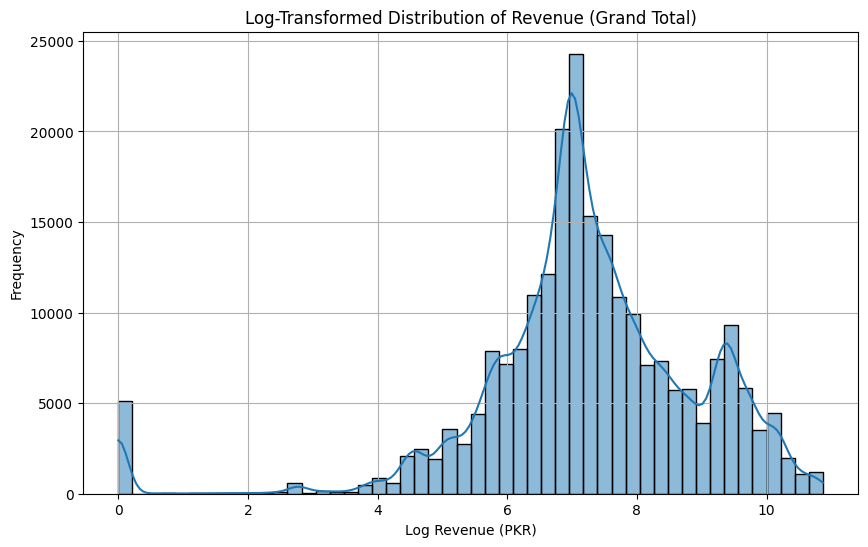

In [28]:
# 1. Revenue Distribution
plt.figure(figsize=(10, 6))
sns.histplot(
    np.log1p(data[data['grand_total'] < data['grand_total'].quantile(0.99)]['grand_total']),
    bins=50,
    kde=True
)
plt.xlabel("Log Revenue (PKR)")
plt.ylabel("Frequency")
plt.title("Log-Transformed Distribution of Revenue (Grand Total)")
plt.grid(True) 
plt.show()




C:\Users\balla\AppData\Local\Temp\ipykernel_9584\984979881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="Blues_r")


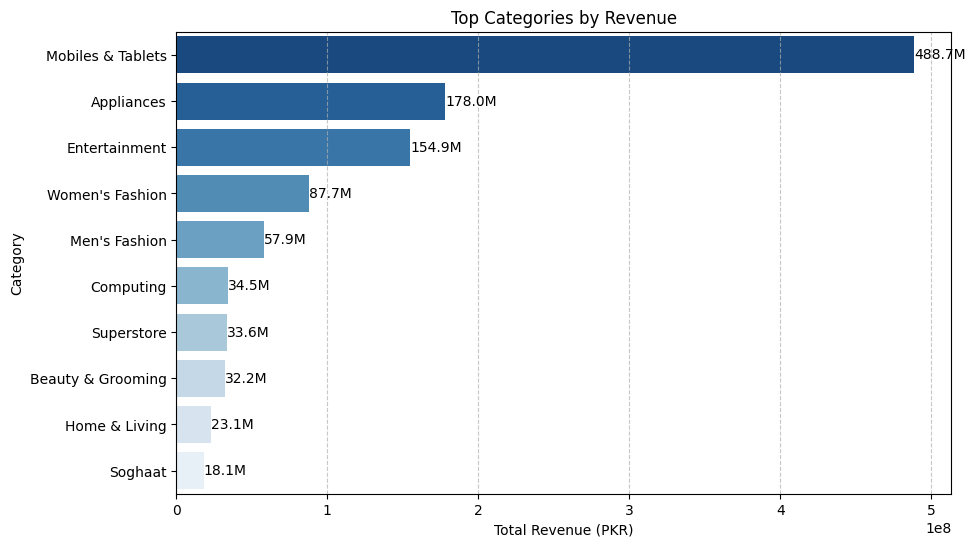

In [29]:
plt.figure(figsize=(10, 6))
category_revenue = data.groupby('category_name_1')['grand_total'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="Blues_r")

for index, value in enumerate(category_revenue.values):
    plt.text(value, index, f"{value/1e6:.1f}M", va='center') 

plt.xlabel("Total Revenue (PKR)")
plt.ylabel("Category")
plt.title("Top Categories by Revenue")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


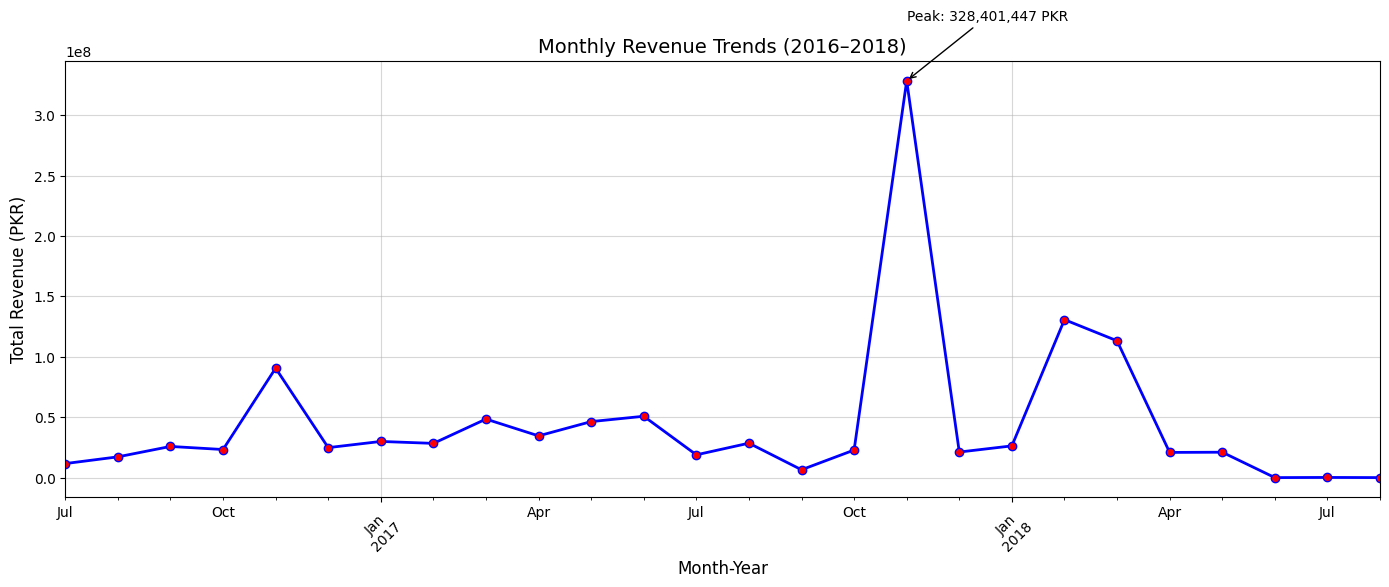

In [30]:
# 3. Monthly Revenue Trends
# Converting the 'created_at' column to datetime format
data['created_at'] = pd.to_datetime(data['created_at'])
data['Month-Year'] = data['created_at'].dt.to_period('M')

# Calculating monthly revenue
monthly_revenue = data.groupby('Month-Year')['grand_total'].sum()

# Plotting the monthly revenue trends
plt.figure(figsize=(14, 6))
monthly_revenue.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2, markerfacecolor='red')

# Annotate the peak revenue month
peak_month = monthly_revenue.idxmax()
peak_value = monthly_revenue.max()
plt.annotate(f"Peak: {peak_value:,.0f} PKR",
             xy=(peak_month, peak_value),
             xytext=(peak_month, peak_value + 0.5e8),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

plt.title("Monthly Revenue Trends (2016–2018)", fontsize=14)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Total Revenue (PKR)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\balla\AppData\Local\Temp\ipykernel_9584\1863833096.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_revenue.index, y=payment_revenue.values, palette="Blues_d")


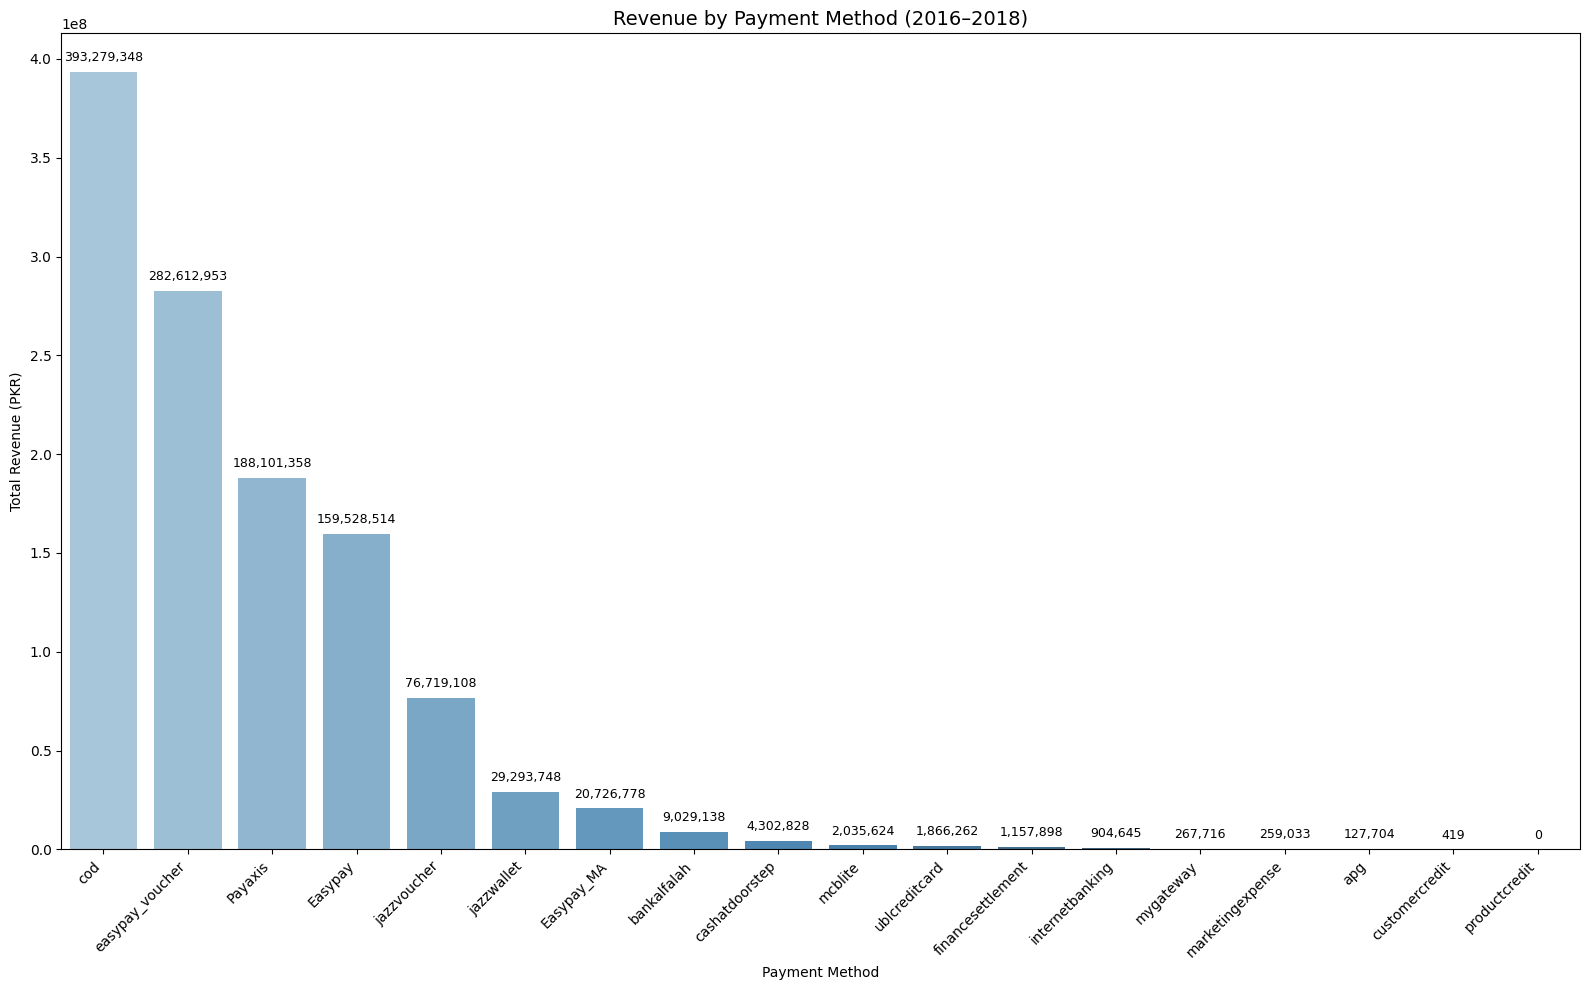

In [35]:
# 4. Payment Method Analysis
# Payment Method Analysis
plt.figure(figsize=(16, 10))
payment_revenue = data.groupby('payment_method')['grand_total'].sum().sort_values(ascending=False)

# Create the barplot
sns.barplot(x=payment_revenue.index, y=payment_revenue.values, palette="Blues_d")

# Annotate bars with revenue values
for i, value in enumerate(payment_revenue.values):
    plt.text(i, value + 0.01 * max(payment_revenue.values), f"{value:,.0f}", ha='center', va='bottom', fontsize=9)

# Add labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel("Payment Method")
plt.ylabel("Total Revenue (PKR)")
plt.title("Revenue by Payment Method (2016–2018)", fontsize=14)
plt.tight_layout()
plt.show()



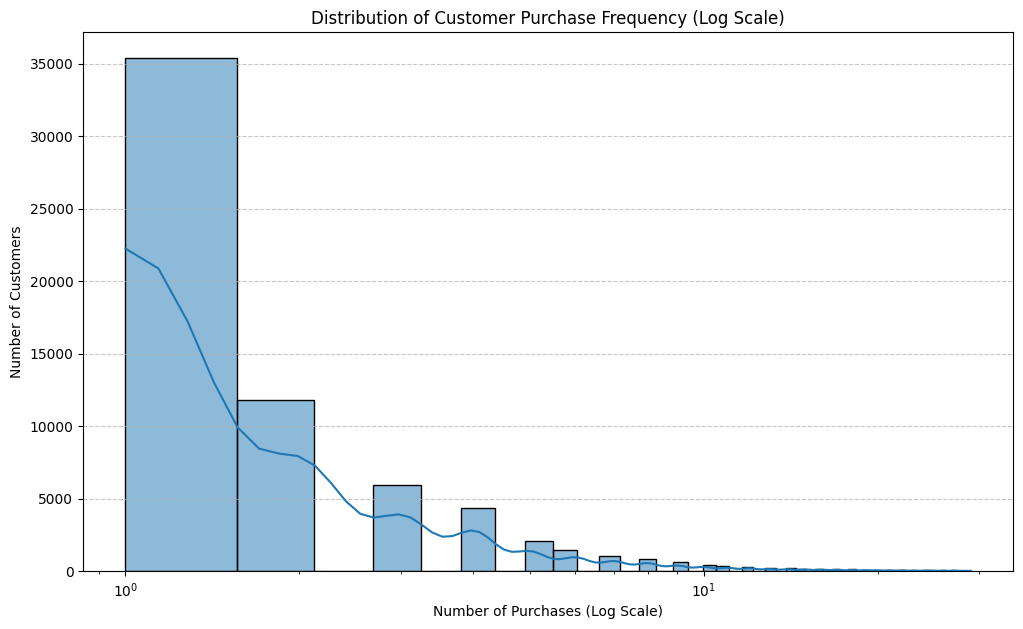

In [36]:
# 5. Customer Purchase Frequency
plt.figure(figsize=(12, 7))
customer_purchase_frequency = data['Customer ID'].value_counts()

filtered_freq = customer_purchase_frequency[customer_purchase_frequency < customer_purchase_frequency.quantile(0.99)]

sns.histplot(filtered_freq, bins=50, kde=True)
plt.xscale('log') 
plt.xlabel("Number of Purchases (Log Scale)")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Purchase Frequency (Log Scale)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



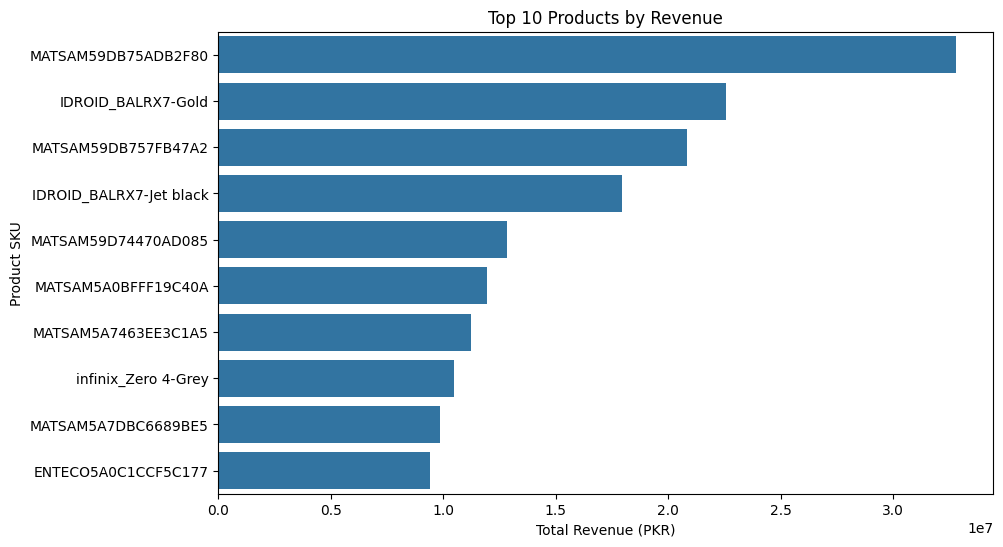

In [24]:
# 6. Top 10 Products by Revenue
plt.figure(figsize=(10, 6))
product_revenue = data.groupby('sku')['grand_total'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=product_revenue.values, y=product_revenue.index)
plt.xlabel("Total Revenue (PKR)")
plt.ylabel("Product SKU")
plt.title("Top 10 Products by Revenue")
plt.show()


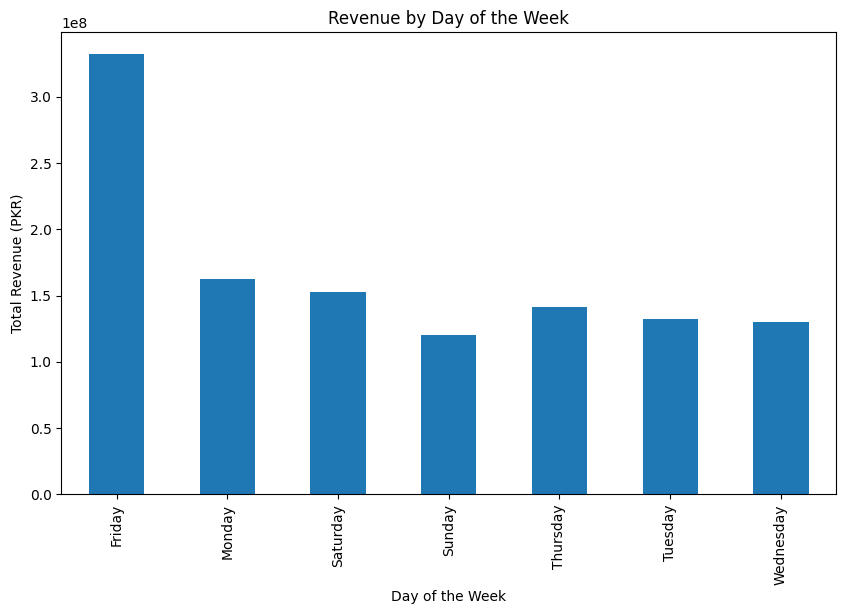

In [14]:
# 7. Day of the Week Analysis
data['Day of Week'] = data['created_at'].dt.day_name()
day_revenue = data.groupby('Day of Week')['grand_total'].sum()
plt.figure(figsize=(10, 6))
day_revenue.sort_index().plot(kind='bar')
plt.title("Revenue by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Revenue (PKR)")
plt.show()

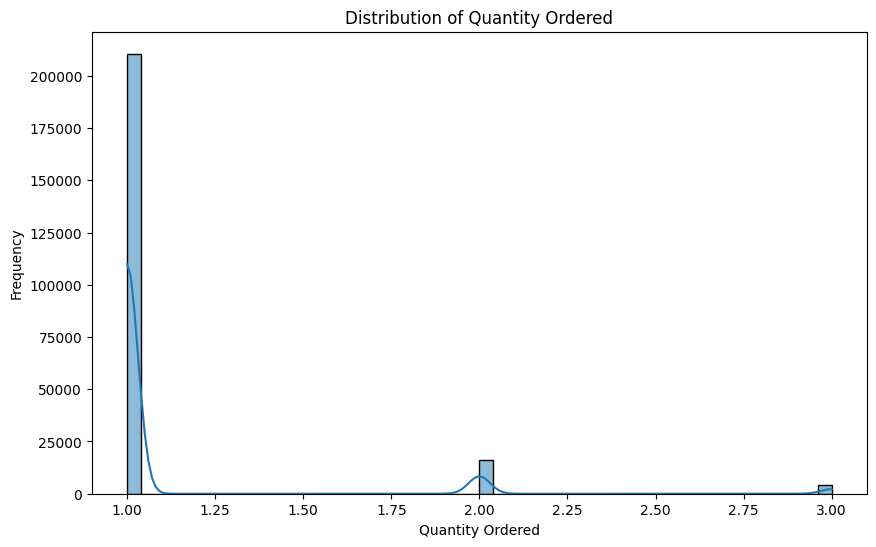

In [25]:
# 8. Quantity Ordered Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data[data['qty_ordered'] < data['qty_ordered'].quantile(0.99)]['qty_ordered'], bins=50, kde=True)
plt.xlabel("Quantity Ordered")
plt.ylabel("Frequency")
plt.title("Distribution of Quantity Ordered")
plt.show()



C:\Users\balla\AppData\Local\Temp\ipykernel_9584\1927336213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['discount_bin'] = pd.cut(filtered_data['discount_amount'], bins=10)
C:\Users\balla\AppData\Local\Temp\ipykernel_9584\1927336213.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['discount_bin'] = filtered_data['discount_bin'].astype(str)
C:\Users\balla\AppData\Local\Temp\ipykernel_9584\1927336213.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is dep

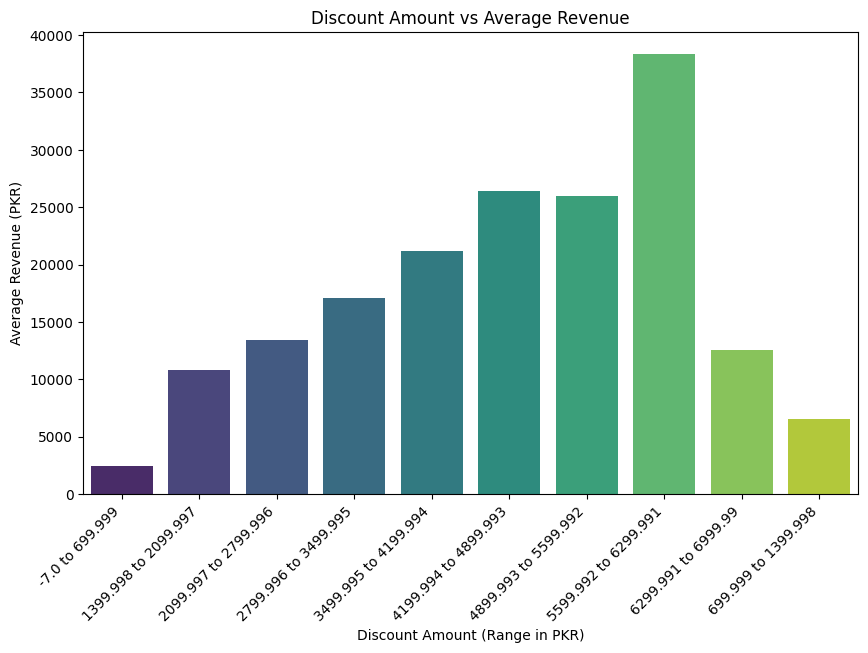

In [42]:
# 9. Discounts vs Revenue
filtered_data = data[(data['discount_amount'] < data['discount_amount'].quantile(0.99)) &
                     (data['grand_total'] < data['grand_total'].quantile(0.99))]

filtered_data['discount_bin'] = pd.cut(filtered_data['discount_amount'], bins=10)

filtered_data['discount_bin'] = filtered_data['discount_bin'].astype(str)
bin_data = filtered_data.groupby('discount_bin')['grand_total'].mean().reset_index()


bin_data['discount_bin'] = bin_data['discount_bin'].apply(lambda x: x.replace("(", "").replace("]", "").replace(",", " to"))

# Plot aggregated data
plt.figure(figsize=(10, 6))
sns.barplot(data=bin_data, x='discount_bin', y='grand_total', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Discount Amount (Range in PKR)")
plt.ylabel("Average Revenue (PKR)")
plt.title("Discount Amount vs Average Revenue")
plt.show()



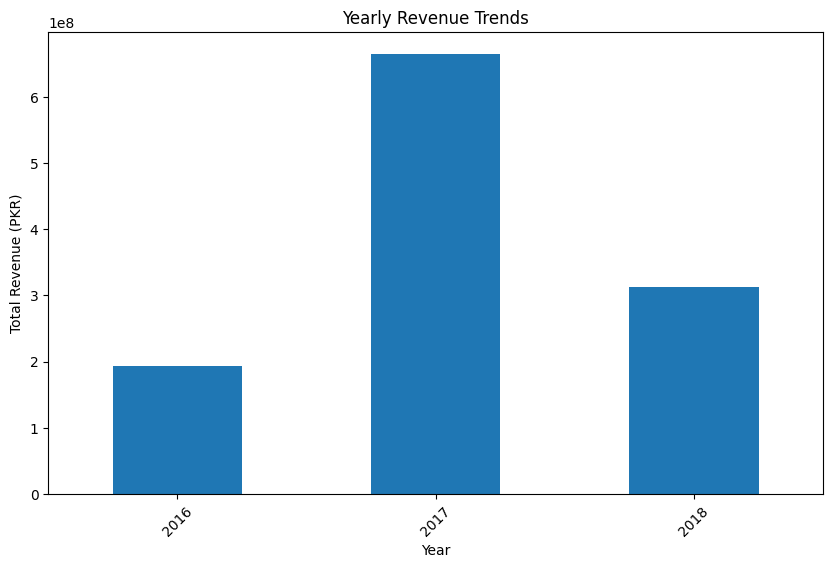

In [17]:
# 10. Revenue by Year
data['Year'] = data['created_at'].dt.year
yearly_revenue = data.groupby('Year')['grand_total'].sum()
plt.figure(figsize=(10, 6))
yearly_revenue.plot(kind='bar')
plt.title("Yearly Revenue Trends")
plt.xlabel("Year")
plt.ylabel("Total Revenue (PKR)")
plt.xticks(rotation=45)
plt.show()


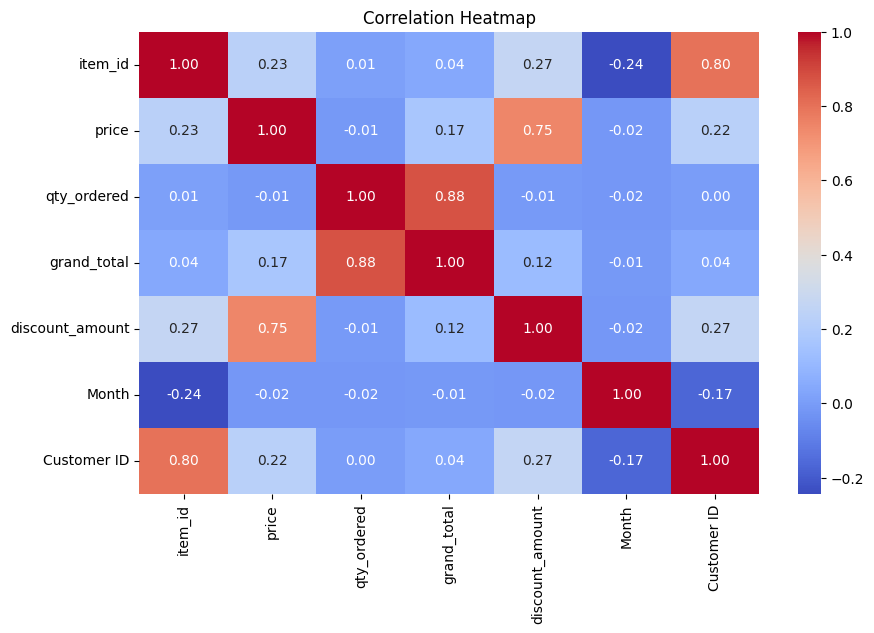

In [19]:
# Correlation Analysis
plt.figure(figsize=(10, 6))

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
